# Fourier Analysis

Fourier analysis is a field of study used to analyze the periodicity in (periodic) signals. If a signal contains components which are periodic in nature, Fourier analysis can be used to decompose this signal in its periodic components. Fourier analysis tells us at what the frequency of these periodical component are.

For example, if we measure your heart beat and at the time of measurement you have a heart rate of 60 beats / minute, the signal will have a frequency of 1 Hz (Period of 1 S = frequency of 1 Hz). If you are doing at the same time, some repetitive task where you move your fingers every two seconds, the signal going to you hand will have a frequency of 0.5 Hz (Period of 2 S = frequency of 0.5 Hz). An electrode placed on your arm, will measure the combination of these two signals. And a Fourier analysis performed on the combined signals, will show us a peak in the frequency spectrum at 0.5 Hz and one at 1 Hz.

So, two (or more) different signals (with different frequencies, amplitudes, etc) can be mixed together to form a new composite signal. The new signal then consists of all of its component signals.

In [3]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy import fft
import pandas as pd

In [46]:
t = np.linspace(0,1,100)

In [47]:
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
series = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*t) for ii in range(0,len(amplitudes))]

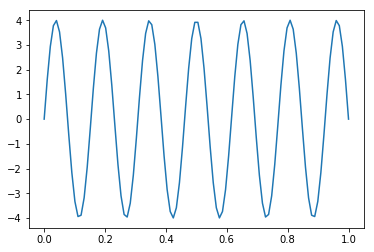

In [48]:
x = series[0]
plt.plot(t,x)

## Fast Fourier Transform

The Fast Fourier Transform (FFT) is an efficient algorithm for calculating the Discrete Fourier Transform (DFT) and is the de facto standard to calculate a Fourier Transform. It is present in almost any scientific computing libraries and packages, in every programming language.

Nowadays the Fourier transform is an indispensable mathematical tool used in almost every aspect of our daily lives. In the next section we will have a look at how we can use the FFT and other Stochastic Signal analysis techniques to classify time-series and signals.

 

In [49]:
p = np.polyfit(t,x,1)
x_notrend = x-p[0]*t
x_freqdom = fft.fft(x_notrend)

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


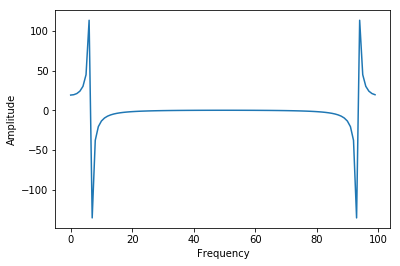

In [50]:
plt.plot(x_freqdom)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

### Example: Forecasting retail sales

In [51]:
df = pd.read_csv("./data/retail_sales.csv")
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


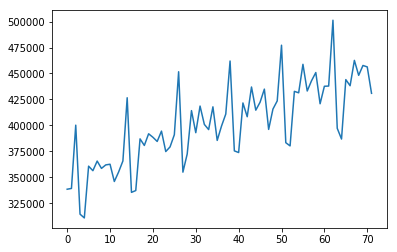

In [52]:
df['sales'].plot()

In [53]:
x = df['sales']
n = x.size # size of the series

t = np.arange(0, n)
p = np.polyfit(t,x,1)
x_notrend = x-p[0]*t
x_freqdom = fft.fft(x_notrend)

C:\Users\HP\Anaconda3\envs\cnb\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Amplitude')

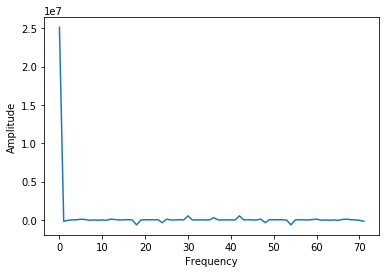

In [54]:
plt.plot(x_freqdom)
plt.xlabel("Frequency")
plt.ylabel("Amplitude")

In [55]:
def fourierExtrapolation(x, n_predict, n_harm = 10):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    idxs = list(range(n))
    # sort indexes by frequency, lower -> higher
    idxs.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in idxs[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

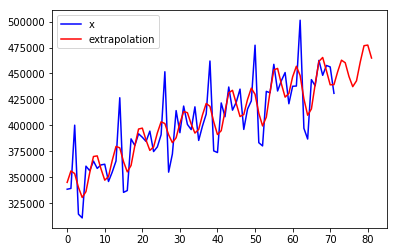

In [57]:
n_predict = 10
extrapolation = fourierExtrapolation(x, n_predict, n_harm=15)
plt.plot(np.arange(0, x.size), x, 'b', label = 'x')
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()